In [1]:
import numpy as np


In [2]:
#2.1 Creating the initial board
N = 50
Lattice = np.random.randint(0,2,[N,N])          # Using randint approach
Lattice[Lattice == 0] = -1                          # Converting '0' into '-1'

print(Lattice)

[[ 1 -1  1 ...  1 -1  1]
 [ 1 -1  1 ...  1 -1 -1]
 [ 1  1 -1 ...  1  1 -1]
 ...
 [-1 -1  1 ...  1 -1  1]
 [ 1 -1 -1 ...  1 -1 -1]
 [ 1  1  1 ...  1 -1 -1]]


In [3]:
def local_E(board,i,j,J,size):
    fset = [(-1,0),(1,0),(0,-1),(0,1)]
    list1 = []
    
    for (dx,dy) in fset:
        # Y = I
        k = i + dy
        # X = J
        l = j + dx
        #print(k,l)
        if (k,l) != (i,j) and 0 <= k <= size-1 and  0 <= l <= size-1:
            list1.append( board[k][l] * board[i][j] )

    return sum(list1)

In [4]:
from numpy import exp
T = 1
beta = 1/T
J = 1
E = 0



def Ising(Lattice, T, beta, J, E, steps, seed):
#random flip
    np.random.seed(seed)
    for i in range(steps):


        
        LEi_list = []
        for x in range(len(Lattice)):
            for y in range(len(Lattice)):
                LEi_list.append( local_E(Lattice,y,x,J,N) )
        Ei = sum(LEi_list)/2


        X = np.random.randint(0,50)
        Y = np.random.randint(0,50)
        Lattice[Y,X] = Lattice[Y][X] * -1


        #Delta E
        LEf_list = []
        for x in range(len(Lattice)):
            for y in range(len(Lattice)):
                LEf_list.append( local_E(Lattice,y,x,J,N) )
        Ef = sum(LEf_list)/2


        #Metropolis
        delta_E = -J*(Ef - Ei)
        if delta_E <= 0: 
            E += delta_E
        elif delta_E > 0:
            r = np.random.randint(0,1)
            if r <= np.exp(-beta*delta_E ): 
                E += delta_E
            else:
                Lattice[Y,X] = Lattice[Y,X] * -1

    Magnetization = Lattice.sum()

    return Lattice, Magnetization


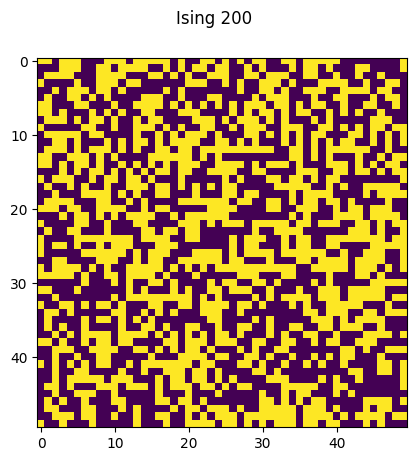

In [5]:
from matplotlib import pyplot as plt
fig, axs = plt.subplots()
fig.suptitle('Ising 200')
axs.imshow(Ising(Lattice, T, beta, J, E, 10000, 20)[0], interpolation='nearest')
